In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

import numpy as np

In [2]:
alpha = 0.25    # exponential law coefficient

ti = 0.0        # initial time
tf = 5.0        # final time
dt = 0.25        # time step

Ni = 100        # initial condition

In [3]:
# computing no. of steps
# no. of steps must be an integer and it can be obtained from tf - ti / dt
# but the above formula might give float values since tf, ti and dt are float
# therefore we need to convert it to integer using int function
# int function converts float to integer by ignoring the decimal
# e.g. int(5.0/2.0)=2
nt = int((tf-ti)/dt)

# now we create a numpy array for intermediate value of N including those at ti and tf
# empty array means values in the array have not been initialized and can take any value
# in the range allowed by numerical precision
# initializing takes time, so unless you need an array of zeros, np.empty is better over np.zeros
N = np.empty(nt+1)

# passing the initial condition to array
N[0] = Ni

# building the array by time stepping
# since N has nt+1 elements, we will loop index i from 0 -> nt, and define N[i+1] 
for i in range(nt):
    N[i+1] = N[i] - alpha*N[i]*dt

In [4]:
# to compute the exact solution, we need the time array

# since nt=int(tf-ti/dt) gives no. of elements in the array as nt+1
# and since the N(numerical) array had nt+1 elements initiliazed as N=np.empty(nt+1)
# we need our time array to also have nt+1 elements
# moreover, each element should be index multiplied by dt
t = np.arange(nt+1) * dt

# now we can build the exact solution
Nexact = Ni*np.exp(-alpha*t)

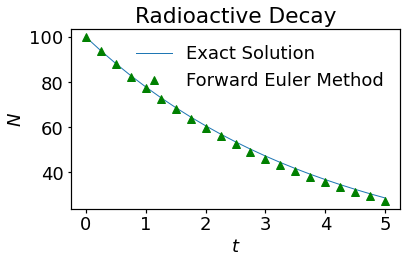

In [5]:
# create a figure with a single plot
fig, ax = plt.subplots()

ax.plot(t,Nexact,linestyle='-', label='Exact Solution')
ax.plot(t,N,'^',color='green',label='Forward Euler Method')

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive Decay')

ax.legend()


In [6]:
# creating an array with smaller and smaller timesteps
dt_list = np.array([0.5/2**k for k in range (5)])

# creating an array to store the values of N(tf)
# mumpy.empty_like is like numpy.empty that it creates a non-initialised array
# but numpy.empty_like takes parameter - sequence or an array as input
# the output will have the same shape as size as the input
# and numpy.empty takes an integer as input
values = np.empty_like(dt_list)

# in essence, now we we want to do what we did above but for all values of dt in dt_list
# and not just for dt = 0.5
# we could create a loop such as
#i=0
# for dt in dt_list
#    (do something...)
#    i += 1

# however, we will use the enumerate function
# enumerate function counts the number of elements in iterable object
# and returns counter at the end of each iteration

for i, dt in enumerate(dt_list):
    
    N = Ni
    
    nt = int((tf-ti)/dt)

    for j in range(nt):
        N = N - alpha*N*dt

    # this is the final value of N i.e. N(tf) for different i,dt
    # calculated according to forward euler schemes
    values[i] = N
    
# now calculating the error between numerical (fwd euler) and analytical solutions
error = np.abs(values - Ni*np.exp(-alpha*tf))


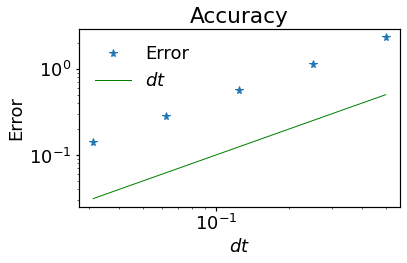

In [8]:
fig, ax = plt.subplots()

ax.loglog(dt_list,error,'*', label='Error')
ax.loglog(dt_list,dt_list,color='green', label='$dt$')

ax.set_xlabel('$dt$')
ax.set_ylabel('Error')
ax.set_title('Accuracy')

ax.legend()
